In [4]:
!pip install -q gradio==3.50.2 gdown numpy datasets

In [5]:
from datasets import load_dataset

dataset = load_dataset("mnist")

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout
import numpy as np

In [7]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [8]:
dataset['train'].features

{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], id=None)}

In [9]:
np.array(dataset['train'][0]['image']).shape

(28, 28)

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
encoder = OneHotEncoder(sparse=False)


In [13]:
tf_train_dataset = dataset['train'].to_tf_dataset(shuffle=True,columns = ['image','label'],batch_size=16)
tf_test_dataset = dataset['test'].to_tf_dataset(shuffle=True,columns =['image','label'],batch_size=16)
X_test = np.array([np.array(img) for img in dataset['test'][:]['image']])
y_test = encoder.fit_transform(np.array(dataset['test'][:]['label']).reshape(-1,1))
X = np.array([np.array(img) for img in dataset['train'][:]['image']])
y = encoder.fit_transform(np.array(dataset['train'][:]['label']).reshape(-1,1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
model = Sequential()

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(x=X,y=y,validation_data=(X_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 2.1501 - accuracy: 0.7006 - val_loss: 0.4658 - val_accuracy: 0.8669
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5309 - accuracy: 0.8520 - val_loss: 0.2853 - val_accuracy: 0.9247
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3675 - accuracy: 0.8976 - val_loss: 0.2394 - val_accuracy: 0.9395
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2914 - accuracy: 0.9200 - val_loss: 0.2173 - val_accuracy: 0.9431
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2466 - accuracy: 0.9330 - val_loss: 0.1640 - val_accuracy: 0.9571


In [17]:
X.shape,y.shape

((60000, 28, 28), (60000, 10))

In [21]:
def predict(img):
  try:
    img = np.array(img).reshape(1, 28, 28)
    out = model.predict(img)
    top5 = np.argsort(out[0])[::-1][:5]
    labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

    # Create a dictionary with label-probability pairs for the top 5 predictions
    probabilities = {labels[i]: float(out[0][i]) for i in top5}

    return probabilities
  except:
    return {"None":1.0}


In [22]:
predict(X_test[0])

{'None': 1.0}

In [ ]:
out = model.predict([X_test[0:1]])

1/1 [==============================] - 0s 19ms/step


In [ ]:
np.argsort(out[0])[::-1][:5]

array([7, 9, 5, 3, 0])

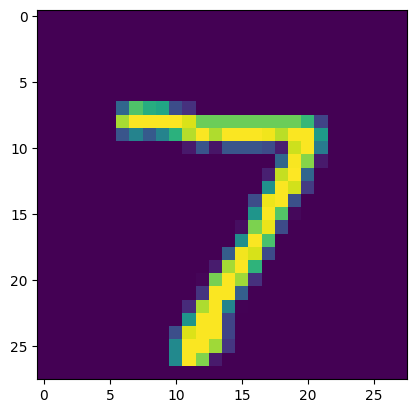

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0])

In [2]:
import gradio as gr

In [24]:
gr.Interface(fn=predict,
             inputs='sketchpad',
             outputs="label",
             live=True).launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://3933b440ff48083fb4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 30ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://3933b440ff48083fb4.gradio.live


In [25]:
# Create an instance of the ImageDataGenerator class for data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,        # Random rotation up to 15 degrees
    width_shift_range=0.1,   # Random horizontal shift
    height_shift_range=0.1,  # Random vertical shift
    horizontal_flip=True,    # Random horizontal flipping
    zoom_range=0.1           # Random zooming
)

# Apply data augmentation to the dataset
augmented_images = []
augmented_labels = []

for example in dataset["train"]:
    image = example["image"]
    label = example["label"]

    augmented_image = datagen.random_transform(image)

    augmented_images.append(augmented_image)
    augmented_labels.append(label)

# Create a new dataset with augmented data
augmented_dataset = tf.data.Dataset.from_tensor_slices(
    (tf.stack(augmented_images), tf.constant(augmented_labels))
)


AttributeError: ignored